# Análisis de factores en la calidad de los vinos
# Semana i: Equipo 9
## Integrantes:
* Christopher Luis Miranda Vanegas
* Katia Yareth Bellido López
* Gerardo Anglada De Landa
* Rubén Hernández Rivas
---
## Introducción
Con este set de datos queremos encontrar qué son los factores clave en el juegan el rol en tener un vino de buena calidad.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# NOTA: Se tiene que actualizar el path para el archivo csv
# path = "/content/drive/MyDrive/7 semestre/SemanaI/winequality.csv"
path = "winequality.csv" 
df = pd.read_csv(path)
df.head() # probamos que la ruta funcione

,wine_color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# buscamos si tenemos registros con campos vacíos
df.isnull().sum()

wine_color              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#print(df.info())
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Observaciones preliminares:
*   Dentro del dataset no se cuenta con datos nulos o vacíos, por lo que ***no es necesaria alguna limpieza de los datos.***
*   Con el metodo describe(), podemos observar que la calidad mínima de nuestro csv es de 3, lo cuál es una calidad baja y el vino con calidad más alta es de 9. Entonces podemos decir que en promedio, un vino >= 6 es de buena calidad.

---
# Manejo de datos
Los atributos que usaremos de forma principal para manejar el dataframe son *wine_color* y *quality*.  
El primero porque las características de un vino tinto son distintos a los de un blanco, y sacar estadísticas como el la media y la moda pueden devolver datos no característicos, especialmente porque tenemos un número desbalanceado de tintos y blancos.  
  
El segundo atributo es *quality* y similiar al atributo anterior, queremos saber qué hacer característico a una vino de buena calidad, y si sacamos un promedio entre los considerados como mejores con los considerados como peores, no sabremos qué atributos juegan rol en la calidad.

In [5]:
print('Cantidad de vinos por color en nuestro dataframe:')
print(df.groupby(['wine_color']).size())
print()
print('Cantidad de vinos por nivel de calidad en nuestro dataframe:')
print(df.groupby(['quality']).size())

Cantidad de vinos por color en nuestro dataframe:
wine_color
red      1599
white    4898
dtype: int64

Cantidad de vinos por nivel de calidad en nuestro dataframe:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64


In [6]:
# Creación de dataframes separados por color "red" 
vinosRojos = df[df['wine_color'] == "red"] # Hace nuevo dataframe de puros vinos tintos
buenosRojos = vinosRojos[vinosRojos['quality'] >= 6] # los vinos tintons de buena calidad
malosRojos = vinosRojos[vinosRojos['quality'] < 6]

sumaBuenosRojos = buenosRojos['wine_color'].count()
sumaMalosRojos = malosRojos['wine_color'].count()

print('Tenemos',sumaBuenosRojos,'tintos con una calificación mayor a 6')
print('y',sumaMalosRojos,'tintos con una calificación menor a 7.')

Tenemos 855 tintos con una calificación mayor a 6
y 744 tintos con una calificación menor a 7.


In [7]:
# Creación de dataframes separados por color "white" 
vinosBlancos = df[df['wine_color'] == "white"] # Hace nuevo dataframe de puros vinos blancos
buenosBlancos = vinosBlancos[vinosBlancos['quality'] >= 6] # los vinos tintons de buena calidad
malosBlancos = vinosBlancos[vinosBlancos['quality'] < 6]

sumaBuenosBlancos = buenosBlancos['wine_color'].count()
sumaMalosBlancos = malosBlancos['wine_color'].count()

print('Tenemos',sumaBuenosBlancos,'blancos con una calificación mayor a 6')
print('y',sumaMalosBlancos,'blancos con una calificación menor a 7.')

Tenemos 3258 blancos con una calificación mayor a 6
y 1640 blancos con una calificación menor a 7.


---
# Visualización de los datos

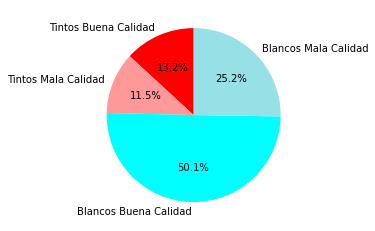

In [8]:
categorias = ['Tintos Buena Calidad', 'Tintos Mala Calidad', 'Blancos Buena Calidad', 'Blancos Mala Calidad']
conteoDeVinos = [sumaBuenosRojos, sumaMalosRojos, sumaBuenosBlancos, sumaMalosBlancos]
plt.pie(conteoDeVinos, labels = categorias, colors= ['red','#ff9999','cyan','#97E1E6'] , startangle=90, explode=(0,0,0,0), autopct='%1.1f%%')
plt.show()

## Visualización de datos de Tintos

Usaremos un mapa de calor para encontrar qué atributos "pesan" más en la calidad del vino.


Vinos Tintos


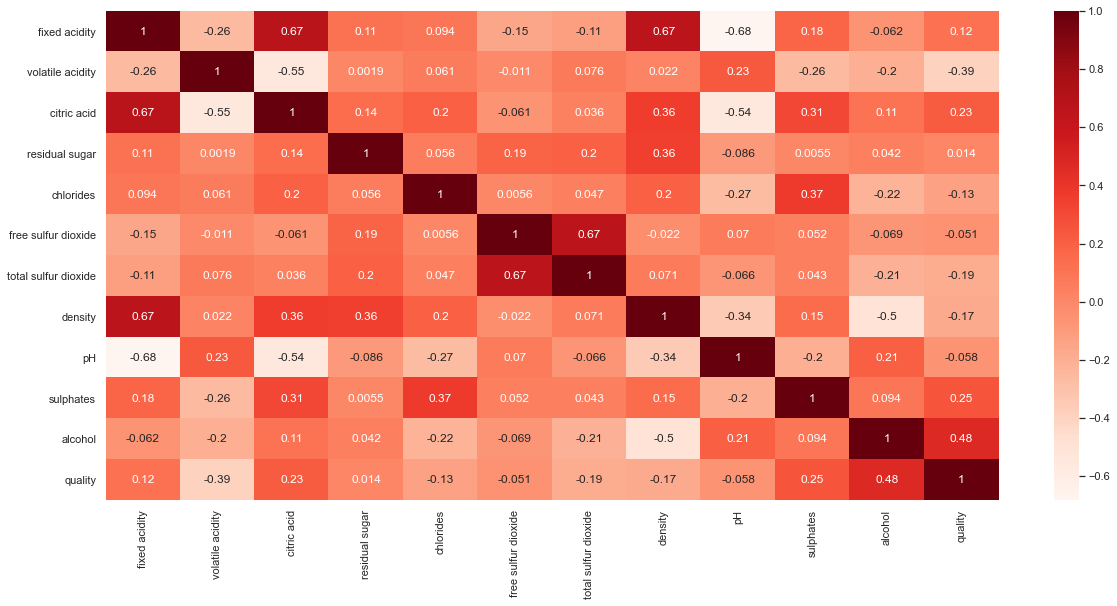

In [9]:
# Heatmap de los vinos Tintos
sns.set(rc = {'figure.figsize':(20, 9)})

print()
print('Vinos Tintos')

cor_matrix = vinosRojos.corr()
sns.heatmap(cor_matrix, annot = True, cmap = 'Reds')
plt.show()


Vinos Tintos BUENOS


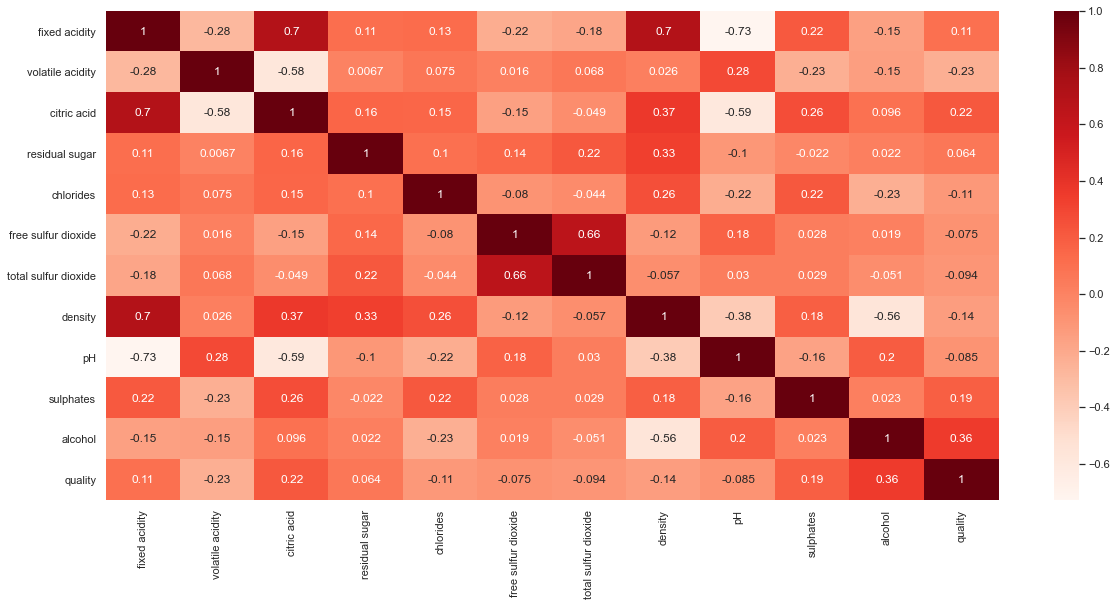

In [10]:
# Heatmap de los vinos Tintos Buenos
sns.set(rc = {'figure.figsize':(20, 9)})

print()
print('Vinos Tintos BUENOS')

cor_matrix = buenosRojos.corr()
sns.heatmap(cor_matrix, annot = True, cmap = 'Reds')
plt.show()


Vinos Tintos MALOS


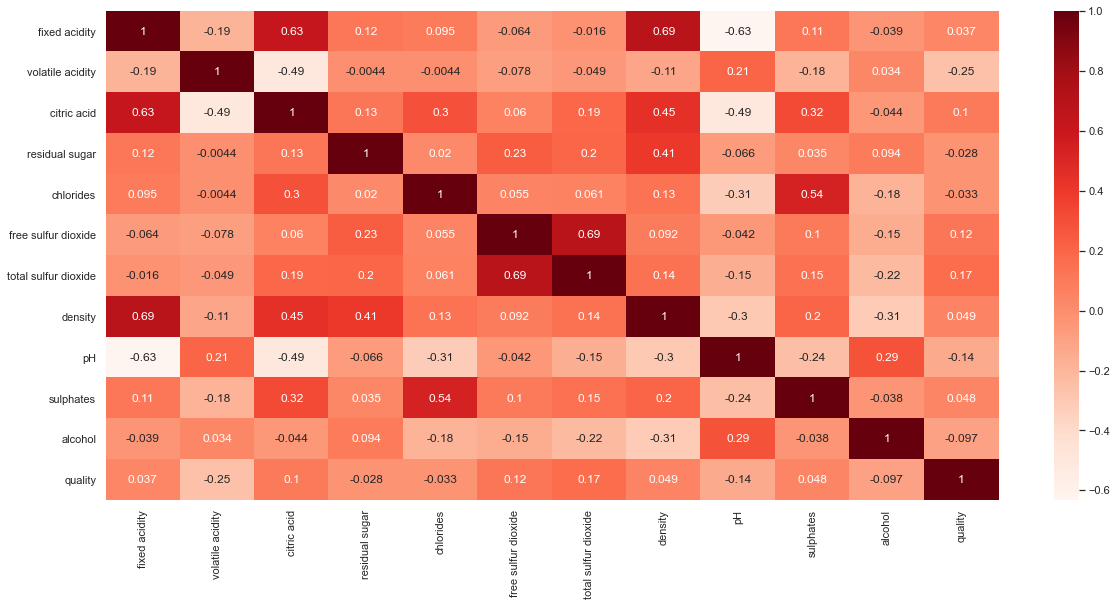

In [11]:
# Heatmap de los vinos Tintos MALOS
sns.set(rc = {'figure.figsize':(20, 9)})

print()
print('Vinos Tintos MALOS')

cor_matrix = malosRojos.corr()
sns.heatmap(cor_matrix, annot = True, cmap = 'Reds')
plt.show()

#### Con estos mapas de calor, determinamos que los factores que más influyen en la calidad de los vinos tintos son:
* ***citric acid:*** (factor que se mide en (g / dm^3; normalmente en pequeñas cantidades, agrega "frescura" al vino)
* ***sulphates:*** (aditivo que influye en los niveles de dióxido de sulfuro en el vino. Ayuda en la prevención de formación de microbios y oxidación del vino; en niveles altos se vuelve evidente con un olor y sabor, no necesariamente agradable)
* ***alcohol:*** (el porcentaje de alcohol presente en el vino)

In [12]:
# Estadísticas de los factores que influyen a un buen vino tinto
print()
print('Detalles Buenos Tintos')
buenosRojos[['citric acid', 'free sulfur dioxide', 'total sulfur dioxide','alcohol']].describe()


Detalles Buenos Tintos


,citric acid,free sulfur dioxide,total sulfur dioxide,alcohol
count,855.000000,855.000000,855.000000,855.000000
mean,0.299883,15.272515,39.352047,10.855029
std,0.199889,10.038538,27.253280,1.106109
min,0.000000,1.000000,6.000000,8.400000
25%,0.115000,7.000000,20.000000,10.000000
50%,0.310000,13.000000,33.000000,10.800000
75%,0.460000,20.500000,50.000000,11.700000
max,0.780000,72.000000,289.000000,14.000000


In [13]:
# Estadísticas de los factores que influyen a un mal vino tinto
print()
print('Detalles Malos Tintos')
malosRojos[['citric acid', 'free sulfur dioxide', 'total sulfur dioxide','alcohol']].describe()


Detalles Malos Tintos


,citric acid,free sulfur dioxide,total sulfur dioxide,alcohol
count,744.000000,744.000000,744.000000,744.000000
mean,0.237755,16.567204,54.645161,9.926478
std,0.183368,10.890291,36.720468,0.758007
min,0.000000,3.000000,6.000000,8.400000
25%,0.080000,8.000000,23.750000,9.400000
50%,0.220000,14.000000,45.000000,9.700000
75%,0.360000,23.000000,78.000000,10.300000
max,1.000000,68.000000,155.000000,14.900000


### Conclusiones preliminares tintos
Encontramos que en promedio, uno de los factores determinantes para una buena calidad en un vino tinto es una cantidad alta de alcohol. Esto porque en general vinos que han sido añejados mayor tiempo tienen mayor volumen de alcohol.  
  
Por otro lado, el dióxido de sulfuro en mayores cantidades juega un rol para que el vino sea considerado de menor calidad.

---
## Visualización de datos de Blancos


Vinos Blancos


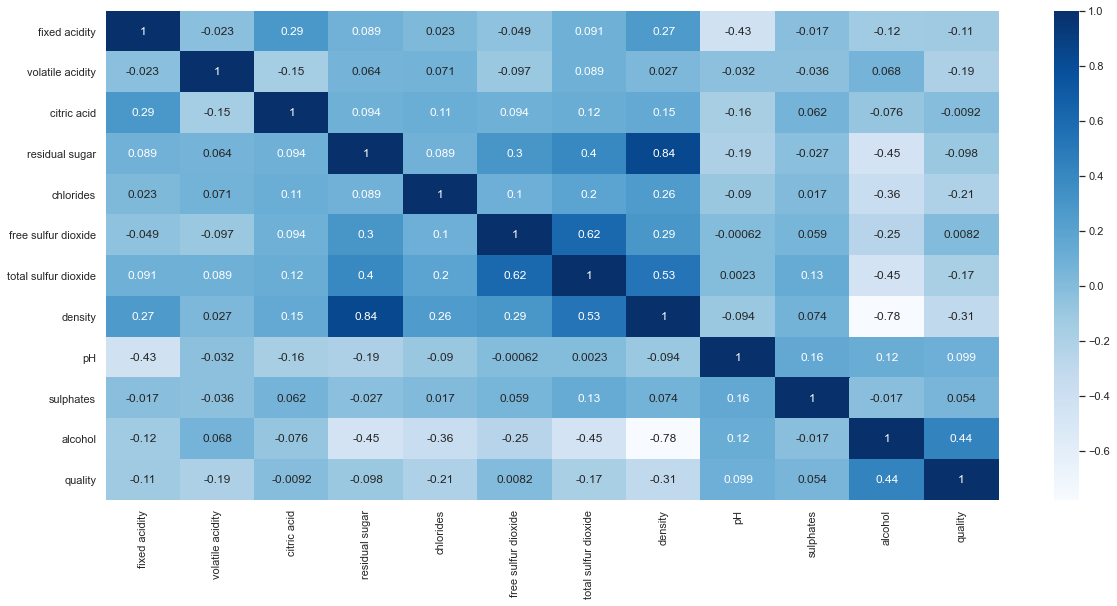

In [14]:
# HeatMap de todos los vinos Blancos
sns.set(rc = {'figure.figsize':(20, 9)})

print()
print('Vinos Blancos')

cor_matrix = vinosBlancos.corr()
sns.heatmap(cor_matrix, annot = True, cmap = 'Blues')
plt.show()


Vinos Blancos BUENOS


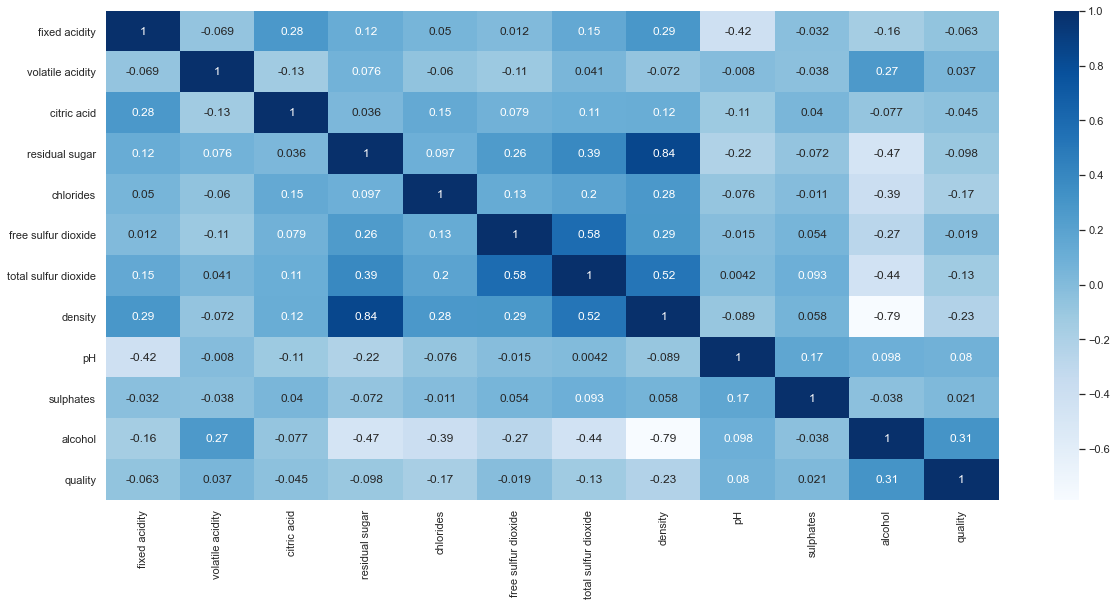

In [15]:
# HeatMap de todos los vinos Blancos BUENOS
sns.set(rc = {'figure.figsize':(20, 9)})

print()
print('Vinos Blancos BUENOS')

cor_matrix = buenosBlancos.corr()
sns.heatmap(cor_matrix, annot = True, cmap = 'Blues')
plt.show()


Vinos Blancos MALOS


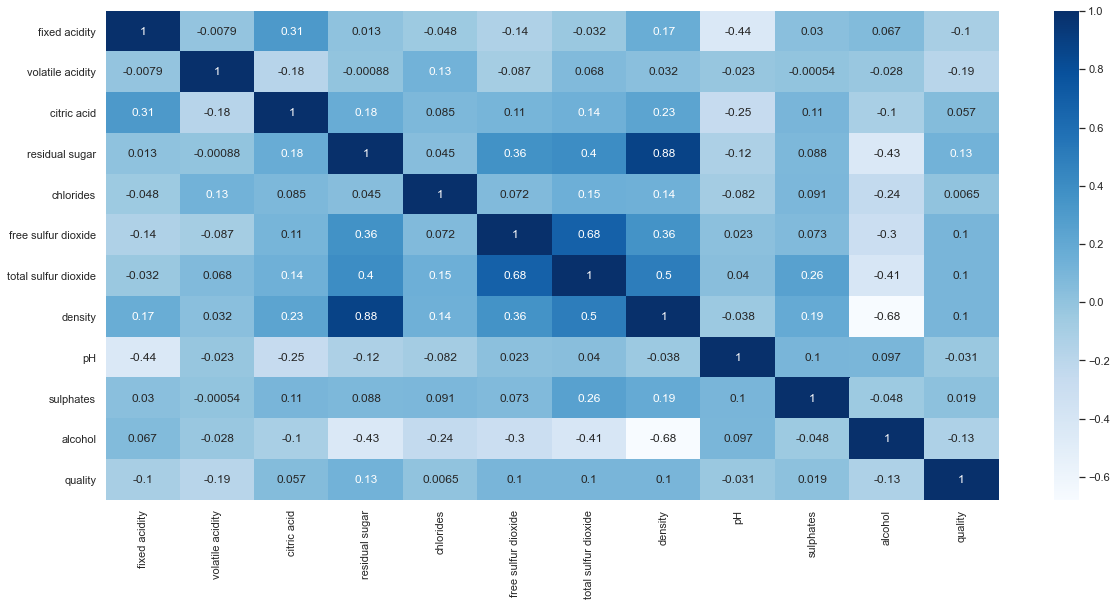

In [16]:
# HeatMap de todos los vinos Blancos MALOS
sns.set(rc = {'figure.figsize':(20, 9)})

print()
print('Vinos Blancos MALOS')

cor_matrix = malosBlancos.corr()
sns.heatmap(cor_matrix, annot = True, cmap = 'Blues')
plt.show()

* A diferencia de los tintos, el ácido cítrico no juega un rol en la calidad de los blancos. Tiene una varianza en general entre todos los Blancos.

**Con estos mapas de calor, determinamos que los factores que más influyen en la calidad de los vinos tintos son:**

* ***volatile acidity:*** (cantidad de ácido acético en vino; entre más, un sabor desagradable a vino)
* ***residual sugar:*** (azúcar que permanece en el vino después de que se detiene a fermentatción)
* ***sulphates:*** (aditivo que influye en los niveles de dióxido de sulfuro en el vino. Ayuda en la prevención de formación de microbios y oxidación del vino; en niveles altos se vuelve evidente con un olor y sabor, no necesariamente agradable)
* ***alcohol:*** (el porcentaje de alcohol presente en el vino)

In [17]:
# Estadísticas de los factores que influyen a un buen vino blanco

print()
print('Detalles Buenos Blancos')
buenosBlancos[['volatile acidity', 'alcohol','residual sugar', 'total sulfur dioxide']].describe()


Detalles Buenos Blancos


,volatile acidity,alcohol,residual sugar,total sulfur dioxide
count,3258.000000,3258.000000,3258.000000,3258.000000
mean,0.262121,10.848880,6.057658,133.207489
std,0.090136,1.247434,4.929353,39.097152
min,0.080000,8.500000,0.700000,18.000000
25%,0.200000,9.800000,1.700000,105.000000
50%,0.250000,10.800000,4.750000,128.000000
75%,0.310000,11.900000,9.100000,158.000000
max,0.965000,14.200000,65.800000,294.000000


In [18]:
# Estadísticas de los factores que influyen a un mal vino blanco

print()
print('Detalles Malos Blancos')
malosBlancos[['volatile acidity', 'alcohol','residual sugar', 'total sulfur dioxide']].describe()


Detalles Malos Blancos


,volatile acidity,alcohol,residual sugar,total sulfur dioxide
count,1640.000000,1640.000000,1640.000000,1640.000000
mean,0.310265,9.849530,7.054451,148.597866
std,0.112548,0.876269,5.283594,46.914579
min,0.100000,8.000000,0.600000,9.000000
25%,0.240000,9.200000,1.700000,117.000000
50%,0.290000,9.600000,6.625000,149.000000
75%,0.350000,10.400000,11.025000,182.000000
max,1.100000,13.600000,23.500000,440.000000


### Conclusiones preliminares Blancos
Encontramos que en promedio, uno de los factores determinantes para una buena calidad en un vino blanco es una cantidad alta de alcohol. Esto porque en general vinos que han sido añejados mayor tiempo tienen mayor volumen de alcohol.  
  
La cantidad de azúcar residual en los Blancos "Malos" es mayor; que nos hace sentido ya que en general un vino que ha añejado por más tiempo es considerado mejor, y al ser añejado más tiempo, se encuentran menores cantidades de azucar residual.

Por otro lado, el dióxido de sulfuro en mayores cantidades juega un rol para que el vino sea considerado de menor calidad.

---
## Análisis más extenso
### Predicciones
**Queremos estar seguros de nuestras conclusiones preliminares, entonces crearemos un dataframe de vinos "premium" para acotar los datos y validar que en efecto las características mencionadas si son clave en las la calidad del vino.**  
  
Para esto, queremos asegurarnos que al acotar la muestra a aquellos que solo tienen una calidad de 8 o 9, los atributos que hemos definidos como clave en la calidad del vino resaltarán más.  
Esto con el conocimiento previo de que normalmente se relaciona el tiempo de añejamiento mayor con un vino de mejor calidad. Este añejamiento juega un rol en los atributos como el azúcar residual y el alcohol.


In [19]:
df.groupby(["quality"]).size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [20]:
premiumRojos = buenosRojos[buenosRojos['quality'] > 7]
premiumBlancos = buenosBlancos[buenosBlancos['quality'] > 7]

In [21]:
premiumRojos[['citric acid', 'free sulfur dioxide', 'total sulfur dioxide','alcohol']].describe()

,citric acid,free sulfur dioxide,total sulfur dioxide,alcohol
count,18.000000,18.000000,18.000000,18.000000
mean,0.391111,13.277778,33.444444,12.094444
std,0.199526,11.155613,25.433240,1.224011
min,0.030000,3.000000,12.000000,9.800000
25%,0.302500,6.000000,16.000000,11.325000
50%,0.420000,7.500000,21.500000,12.150000
75%,0.530000,16.500000,43.000000,12.875000
max,0.720000,42.000000,88.000000,14.000000


In [22]:
buenosRojos[['citric acid', 'free sulfur dioxide', 'total sulfur dioxide','alcohol']].describe()

,citric acid,free sulfur dioxide,total sulfur dioxide,alcohol
count,855.000000,855.000000,855.000000,855.000000
mean,0.299883,15.272515,39.352047,10.855029
std,0.199889,10.038538,27.253280,1.106109
min,0.000000,1.000000,6.000000,8.400000
25%,0.115000,7.000000,20.000000,10.000000
50%,0.310000,13.000000,33.000000,10.800000
75%,0.460000,20.500000,50.000000,11.700000
max,0.780000,72.000000,289.000000,14.000000


## Conclusiones finales de los vinos Tintos y sus factores:
Haciendo una comparación con los vinos buenos rojos (mayor a 5) y los premium (mayor a 7), podemos observar que los factores clave para aumentar la calidad de un vino rojo son el nivel de alcohol y el citric acid en mayores porciones.  
Mientras que la calidad de un vino rojo será afectada a mayor presencia de dióxido de sulfuro.

In [23]:
premiumBlancos[['volatile acidity', 'alcohol','residual sugar', 'total sulfur dioxide']].describe()


,volatile acidity,alcohol,residual sugar,total sulfur dioxide
count,180.000000,180.000000,180.000000,180.000000
mean,0.277972,11.651111,5.628333,125.883333
std,0.106912,1.274349,4.248523,32.719653
min,0.120000,8.500000,0.800000,59.000000
25%,0.200000,11.000000,2.075000,102.750000
50%,0.260000,12.000000,4.300000,122.000000
75%,0.330000,12.600000,8.150000,148.500000
max,0.660000,14.000000,14.800000,212.500000


In [24]:
buenosBlancos[['volatile acidity', 'alcohol','residual sugar', 'total sulfur dioxide']].describe()

,volatile acidity,alcohol,residual sugar,total sulfur dioxide
count,3258.000000,3258.000000,3258.000000,3258.000000
mean,0.262121,10.848880,6.057658,133.207489
std,0.090136,1.247434,4.929353,39.097152
min,0.080000,8.500000,0.700000,18.000000
25%,0.200000,9.800000,1.700000,105.000000
50%,0.250000,10.800000,4.750000,128.000000
75%,0.310000,11.900000,9.100000,158.000000
max,0.965000,14.200000,65.800000,294.000000


## Conclusiones finales de los vinos Blancos y sus factores:
Comparando los vinos buenos blancos (mayor a 5) y los premium (mayor a 7), podemos observar que los factores para una mayor calidad es el de un mayor nivel de alcohol y uno menor de azúcar residual.  
  
Se observó que el dióxido de sulfuro, de igual forma que en los vinos tintos, una mayor porción de éste disminuye la calidad.  
  
Por último, el nivel de ácido acético cambió a lo predecido originalmente, siendo mayor en los premium, cuando antes creíamos que un nivel menor determinaba un mejor Blanco. Pero reflexionando más a fondo, podemos entender que ésto sucede ya que un buen vino Blanco no se busca que sea dulce, y el nivel de ácido acético le da un toque "seco" que puede ser favorable. 

---

# Conclusiones Generales
Este conjunto de datos nos deja claro que hay ciertos atributos que influyen más en la calidad de los vinos.
Como mencionamos en nuestra predicción, los vinos premium, que normalmente tienen un mayor tiempo de añejamiento, ocasiona que tenga un menor nivel de azúcar residual y mayor nivel de alcohol, ambos factores clave.  
El último es la presencia de sulfatos (dióxido de sulfuro) en el vino, el cual -aunque ayuda con sus propiedades antimicrobiales y antioxidantes- en altas concentraciones lleva a una baja calidad, lo que nos hace sentido con los datos visualizados ya que se sabe que vinos de calidad son más suceptibles a que se echen a perder (por su baja concentración de estos sulfatos)